In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\PCA\wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
# Separate features and target
X = df.drop("Type", axis=1)
y = df["Type"]


In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

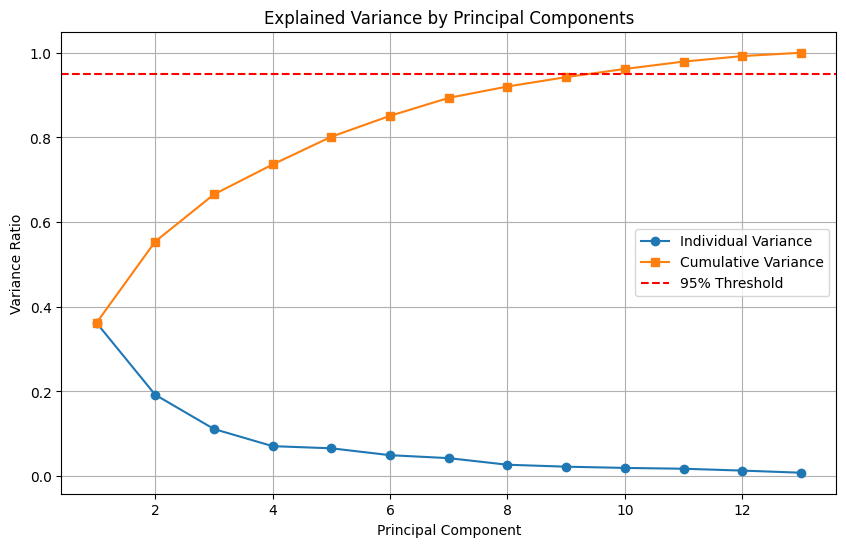

In [25]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Use first 7 components (approx 95% variance)
pca_opt = PCA(n_components=7)
X_reduced = pca_opt.fit_transform(X_scaled)

In [27]:
# Create DataFrame
pca_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(7)])
pca_df.insert(0, 'Type', y)

# View result
print(pca_df.head())

   Type       PC1       PC2       PC3       PC4       PC5       PC6       PC7
0     1  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427
1     1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776
2     1  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205
3     1  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337
4     1  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [29]:
# --- KMeans Clustering on original standardized data ---
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


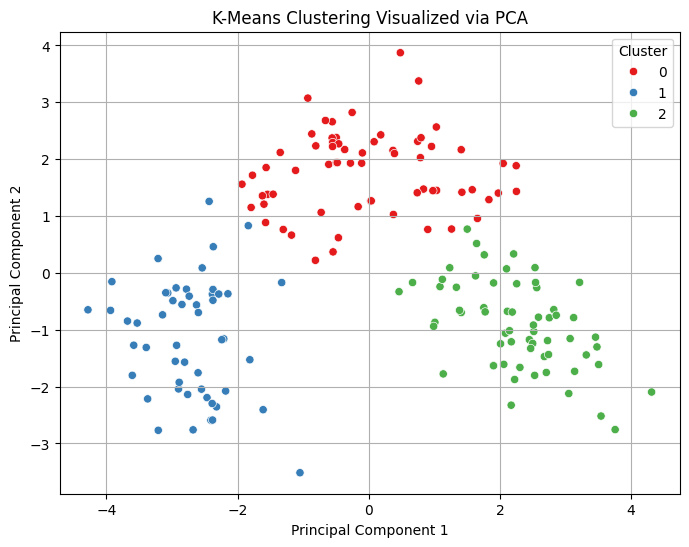

In [30]:
# --- Visualization using 2D PCA ---
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=clusters, palette='Set1')
plt.title("K-Means Clustering Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [31]:
# --- Evaluation Metrics ---
sil_score = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Silhouette Score: 0.2849
Davies-Bouldin Index: 1.3892


In [34]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_reduced)
pca_df['Cluster_PCA'] = clusters_pca

# Visualization using 2D PCA on PCA-reduced data
pca_2d_vis = PCA(n_components=2)
X_pca_2d = pca_2d_vis.fit_transform(X_reduced)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


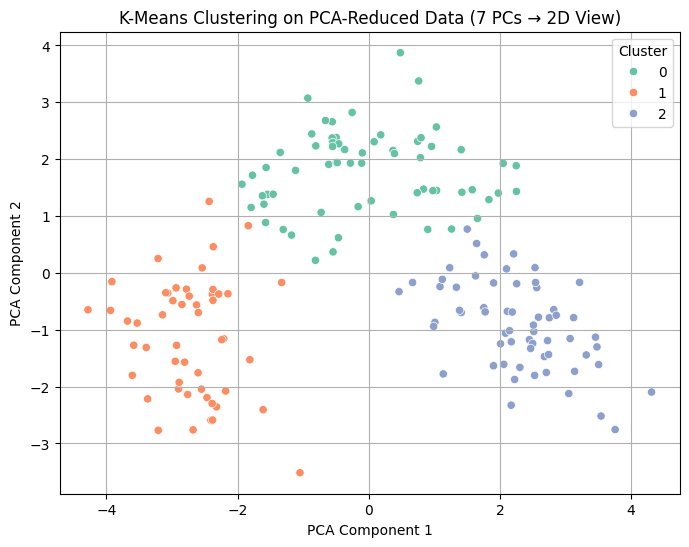

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters_pca, palette='Set2')
plt.title("K-Means Clustering on PCA-Reduced Data (7 PCs → 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [37]:
sil_pca = silhouette_score(X_reduced, clusters_pca)
db_pca = davies_bouldin_score(X_reduced, clusters_pca)
print(f"[PCA Data] Silhouette Score: {sil_pca:.4f}")
print(f"[PCA Data] Davies-Bouldin Index: {db_pca:.4f}")



[PCA Data] Silhouette Score: 0.3276
[PCA Data] Davies-Bouldin Index: 1.2206


In [40]:
# --- Comparison Summary ---
print("\n--- Clustering Comparison Summary ---")
print(f"Silhouette Score (Original): {sil_score:.4f}")
print(f"Silhouette Score (PCA):      {sil_pca:.4f}")
print(f"Davies-Bouldin (Original):   {db_index:.4f}")
print(f"Davies-Bouldin (PCA):        {db_pca:.4f}")


--- Clustering Comparison Summary ---
Silhouette Score (Original): 0.2849
Silhouette Score (PCA):      0.3276
Davies-Bouldin (Original):   1.3892
Davies-Bouldin (PCA):        1.2206
